In [71]:
import numpy as np
import importlib
from matplotlib import pyplot as plt
import pandas as pd
import math
import os
import scipy.stats as st
%matplotlib inline

import analysis
import visualization
importlib.reload(analysis)
importlib.reload(visualization)

<module 'visualization' from '/Users/bang/workspace/iFEED_experiment_result_analysis_2019/visualization.py'>

In [72]:
analyzer = analysis.ResultAnalyzer('/Users/bang/workspace/iFEED_experiment_result_analysis_2019/survey/pilot.csv')

In [73]:
analyzer.loadDataSet('/Users/bang/workspace/iFEED_experiment_result_analysis_2019/survey/pilot_old.csv',old=True)

In [74]:
len(analyzer.subjects)

4

In [75]:
s0 = analyzer.subjects[0]
s1 = analyzer.subjects[1]
s2 = analyzer.subjects[2]
s3 = analyzer.subjects[3]

In [107]:
for i, s in enumerate(analyzer.subjects):
    print("s{0} - feature: {1}, design: {2}".format(i, s.grade_feature_questions()/20, s.grade_design_questions()/10))


s0 - feature: 0.5, design: 0.5
s1 - feature: 0.65, design: 0.6
s2 - feature: 0.65, design: 0.8
s3 - feature: 0.6, design: 0.8


In [79]:
s0.graded_feature_questions

[0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1]

In [102]:
s0.confidence_feature_questions

[5, 5, 85, 40, 5, 5, 5, 5, 5, 10, 5, 5, 5, 15, 10, 6, 5, 6, 5, 5]

In [103]:
s0.graded_design_questions

[1, 0, 1, 1, 0, 1, 1, 0, 0, 0]

In [104]:
s0.confidence_design_questions

[30, 25, 25, 25, 25, 25, 25, 25, 25, 25]

In [83]:
#s0.design_synthesis_task_data

In [84]:
g1 = [s0]
g2 = [s2]
g3 = [s3]

In [85]:
visualizer = visualization.Visualizer([g1,g2,g3], ['r','a','p'])

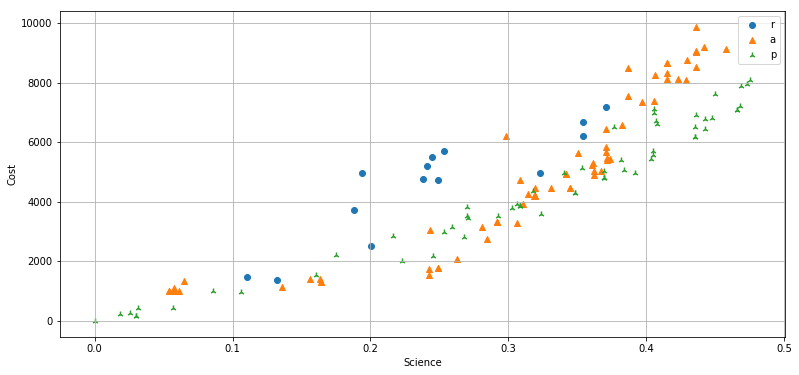

In [86]:
visualizer.designSynthesisScatter()


In [87]:
s0.grade_feature_questions()/20

0.5

In [94]:
s0.confidence_feature_questions

[5, 5, 85, 40, 5, 5, 5, 5, 5, 10, 5, 5, 5, 15, 10, 6, 5, 6, 5, 5]

In [88]:
s0.grade_design_questions()/10

0.5

In [95]:
s0.confidence_design_questions

[30, 25, 25, 25, 25, 25, 25, 25, 25, 25]

In [89]:
s2.grade_feature_questions()/20

0.65

In [90]:
s2.grade_design_questions()/10

0.8

In [91]:
s3.grade_feature_questions()/20

0.6

In [98]:
s3.confidence_feature_questions

[60, 81, 91, 30, 30, 1, 90, 91, 71, 81, 81, 81, 50, 71, 60, 61, 2, 90, 50, 50]

In [92]:
s3.grade_design_questions()/10

0.8

In [99]:
s3.confidence_design_questions

[60, 70, 61, 81, 71, 71, 50, 70, 81, 60]

In [93]:
analyzer.subjects[0].graded_feature_questions

[0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1]

In [61]:
analyzer.subjects[2].graded_feature_questions

[1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0]

In [63]:
analyzer.subjects[3].graded_feature_questions

[1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1]

In [ ]:
analyzer.subjects[0].graded_design_questions

In [ ]:
analyzer.subjects[1].graded_design_questions

In [ ]:
analyzer.subjects[2].graded_design_questions

In [ ]:
analyzer.subjects[2].confidence_design_questions

### Interactive

In [ ]:
x = []
y = []

In [ ]:
participantId = analyzer.subjects[1].participant_id
dirname = '/Users/bang/workspace/iFEED_experiment_result_analysis_2019/data/' + participantId
filename = os.path.join(dirname, participantId + "-design_synthesis.json")

import json
with open(filename, newline='') as file:
    data = json.loads(file.read())
    
designs = data['designs_evaluated']

designObjective_science = []
designObjective_cost = []
for i, d in enumerate(designs):
    designObjective_science.append(d['outputs'][0])
    designObjective_cost.append(d['outputs'][1])

x.append(designObjective_science)
y.append(designObjective_cost)

In [ ]:
len(designObjective_science)

### Manual

In [ ]:
participantId = analyzer.subjects[2].participant_id
dirname = '/Users/bang/workspace/iFEED_experiment_result_analysis_2019/data/' + participantId
filename = os.path.join(dirname, participantId + "-design_synthesis.json")

import json
with open(filename, newline='') as file:
    data = json.loads(file.read())
    
designs = data['designs_evaluated']

designObjective_science = []
designObjective_cost = []
for i, d in enumerate(designs):
    designObjective_science.append(d['outputs'][0])
    designObjective_cost.append(d['outputs'][1])

x.append(designObjective_science)
y.append(designObjective_cost)

In [ ]:
len(designObjective_science)

In [ ]:

conditions = ['interactive', 'manual']

fig, ax = plt.subplots(figsize=(13,6))
colors = ['red','green','blue']
sizes = [80,80,300]
markers = ['o','^','2']

for i in range(2):

    sc = ax.scatter(
               x[i], 
               y[i], 
               c=None, 
               marker=markers[i], 
               cmap="coolwarm", 
               label=conditions, 
               alpha=1.0, 
               edgecolors='none')

ax.legend(conditions)
ax.grid(True)
ax.set_xlabel('Science')
ax.set_ylabel('Cost')
# plt.colorbar(sc)
plt.show()


# Score

In [ ]:
# subjects = analyzer.filterSubjects(pretest_score_threshold=0.5)
subjects = None

means = []
stdevs = []

temp = []

for i in range(3):    
    data = analyzer.getScoreData(subjects=subjects, 
                                 condition_number=i, 
                                 exclude_first_task=True, 
                                 conf_min=0, 
                                 conf_max=100, 
                                 time_min=None)
    
    temp.append(data)

    mean = np.mean(data)
    stdev = np.std(data)
    standardError = stdev / math.sqrt(len(data))
    confInterval = st.t.interval(0.95, len(data)-1, loc=np.mean(data), scale=st.sem(data))
    print("condition: {0}, mean: {1}, std: {2}, standardError: {3}".format(i, mean, stdev, standardError))
    
    means.append(mean)
    stdevs.append(stdev)

In [ ]:
np.shape(temp)

In [ ]:
st.ttest_ind(temp[0], temp[1])

In [ ]:
plotBarGraph(means[0], stdevs[0], means[1], stdevs[1], means[2], stdevs[2])

# Confidence

In [ ]:
# subjects = analyzer.filterSubjects(pretest_score_threshold=0.5)
subjects = None

means = []
stdevs = []

for i in range(3):    
    data = analyzer.getConfidenceData(subjects=subjects, 
                                 condition_number=i, 
                                 exclude_first_task=False)

    mean = np.mean(data)
    stdev = np.std(data)
    standardError = stdev / math.sqrt(len(data))
    confInterval = st.t.interval(0.95, len(data)-1, loc=np.mean(data), scale=st.sem(data))
    print("condition: {0}, mean: {1}, std: {2}, standardError: {3}".format(i, mean, stdev, standardError))
    
    means.append(mean)
    stdevs.append(stdev)

In [ ]:
plotBarGraph(means[0], stdevs[0], means[1], stdevs[1], means[2], stdevs[2])

# Individual Participant Scores

In [ ]:
for i in range(len(analyzer.data)):
    dat = analyzer.data[i]
    print("_______________")
    print("key: {0}".format(dat.key) )
    print("Pretest: {0}".format(dat.getScore(problem_type="pretest")))
    print("DSE: {0}".format(dat.getScore(condition_number=0)))
    print("F_bar: {0}".format(dat.getScore(condition_number=1)))
    print("F_scatter: {0}".format(dat.getScore(condition_number=2)))

In [ ]:
scores = [[],[],[]]
confidences = [[],[],[]]
conditions = [[],[],[]]
times = [[],[],[]]
pretestScores = [[],[],[]]
diff = [[],[],[]]

for i in range(len(analyzer.data)):
    subject = analyzer.data[i]
    
    for j in range(3):
        score = subject.getScore(condition_number=j)
        confidence = subject.getConfidence(condition_number=j)
        time = subject.getTime(condition_number=j)
        pretestScore = subject.getScore(problem_type="pretest")
        scoreDiff = score - pretestScore
        
        scores[j].append(score)
        confidences[j].append(np.mean(confidence))
        times[j].append(np.mean(time))
        pretestScores[j].append(pretestScore)
        diff[j].append(scoreDiff)
    
fig, ax = plt.subplots(figsize=(13,6))
colors = ['red','green','blue']
sizes = [80,80,300]
markers = ['o','^','2']

for i, condition in enumerate(['DSE', 'FSE_bar', 'FSE_scatter']):
    #ax.scatter(scores[i], confidences[i], s=sizes[i], c=colors[i], marker=markers[i], label=condition, alpha=0.6, edgecolors='none')

    sc = ax.scatter(scores[i], 
               times[i], 
               s=sizes[i], 
               c=None, 
               marker=markers[i], 
               cmap="coolwarm", 
               label=condition, 
               alpha=1.0, 
               edgecolors='none')

ax.legend()
ax.grid(True)
ax.set_xlabel('Mean score')
ax.set_ylabel('Mean time')
# plt.colorbar(sc)
plt.show()


In [ ]:
np.shape(diff)

In [ ]:
st.ttest_ind(diff[0], diff[2])

In [ ]:
st.ttest_ind(diff[0], diff[1])

In [ ]:
np.mean(diff[0])

In [ ]:
np.mean(diff[2])

In [ ]:
def plotScatter(x1, x2, x3):
    plt.scatter(x1,x2, s=None, c=x3, alpha=0.5)
    plt.show()

In [ ]:
def plotBarGraph(mean1, stdev1, mean2, stdev2, mean3=None, stdev3=None):
    
    if mean3 is not None:
        N = 3
        means = (mean1, mean2, mean3)
        stdevs = (stdev1, stdev2, stdev3)
    
    else:
        N = 2
        means = (mean1, mean2)
        stdevs = (stdev1, stdev2)
        
    ind = np.arange(N)  # the x locations for the groups
    width = 0.35       # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, means, width, color='skyblue', yerr=stdevs)

    # add some text for labels, title and axes ticks
    ax.set_ylabel('Scores')
    ax.set_title('Scores')
    
    if mean3 is not None:
        ax.set_xticks(ind + width / 3)
        ax.set_xticklabels(('1', '2', '3'))
        
    else:
        ax.set_xticks(ind + width / 2)
        ax.set_xticklabels(('1', '2'))

    #ax.legend((rects1[0], rects2[0]), ('Men', 'Women'))

    plt.show()

In [ ]:
def plotECDF(scores1,scores2):
    
    import statsmodels.api as sm # recommended import according to the docs

    sample = scores1
    ecdf = sm.distributions.ECDF(scores1)
    x = np.linspace(min(sample), max(sample))
    y = ecdf(x)
    plt.step(x, y)

    sample2 = scores2
    ecdf = sm.distributions.ECDF(sample2)
    x = np.linspace(min(sample2), max(sample2))
    y = ecdf(x)
    plt.step(x, y)

    plt.show()

In [ ]:
def writeToFile(data, header ,filePath = "/Users/bang/workspace/iFEED-experiment-201711-result/data/data.csv"):
    with open(filePath, 'w') as f:
        f.write(header + "\n")
        for row in data:
            f.write(",".join(row) + "\n")
    

## All subjects

In [ ]:
subjects = analyzer.results
len(subjects)

In [ ]:
m1,m2,s1,s2 = analyzer.printStatistics(subjects)
plotBarGraph(m1,s1,m2,s2)

In [ ]:
f1,f2 = analyzer.getScoreData(subjects)
data = [[str(x),str(y)] for x,y in zip(f1,f2)]
writeToFile(data, header="First condition, Second condition")
plotECDF(f1,f2)

## All subjects - ordering

In [ ]:
subjects_ordering = analyzer.results
len(subjects_ordering)

In [ ]:
m1,m2,s1,s2 = analyzer.printStatistics(subjects_ordering, order_effect=True)
plotBarGraph(m1,s1,m2,s2)

In [ ]:
f1,f2 = analyzer.getScoreData(subjects_ordering)
data = [[str(x),str(y)] for x,y in zip(f1,f2)]
writeToFile(data, header="First Task, Second Task")
plotECDF(f1,f2)

## STEM majors

In [ ]:
STEM_majors = analyzer.filterByDemographics(STEM=True)
len(STEM_majors)

In [ ]:
m1,m2,s1,s2 = analyzer.printStatistics(STEM_majors)
plotBarGraph(m1,s1,m2,s2)

## Identified as having prior experience

In [ ]:
subjects_with_prior_experience = analyzer.filterByDemographics(prior_experience=True)
len(subjects_with_prior_experience)

In [ ]:
m1,m2,s1,s2 = analyzer.printStatistics(subjects_with_prior_experience)
plotBarGraph(m1,s1,m2,s2)

## Taking SYSEN5400

In [ ]:
subjects_taking_SYSEN5400 = analyzer.filterByDemographics(SYSEN5400=True)
len(subjects_taking_SYSEN5400)

In [ ]:
m1,m2,s1,s2 = analyzer.printStatistics(subjects_taking_SYSEN5400)
plotBarGraph(m1,s1,m2,s2)

In [ ]:
f1,f2 = analyzer.getScoreData(subjects_taking_SYSEN5400)
data = [[str(x),str(y)] for x,y in zip(f1,f2)]
writeToFile(data, header="First condition, Second condition")
plotECDF(f1,f2)

## Not taking SYSEN5400

In [ ]:
subjects_not_taking_SYSEN5400 = analyzer.filterByDemographics(NoSYSEN5400=True)
len(subjects_not_taking_SYSEN5400)

In [ ]:
m1,m2,s1,s2 = analyzer.printStatistics(subjects_not_taking_SYSEN5400)
plotBarGraph(m1,s1,m2,s2)

In [ ]:
f1,f2 = analyzer.getScoreData(subjects_not_taking_SYSEN5400)
data = [[str(x),str(y)] for x,y in zip(f1,f2)]
writeToFile(data, header="First condition, Second condition")
plotECDF(f1,f2)

## Non STEM Major

In [ ]:
non_STEM_subjects = analyzer.filterByDemographics(NonSTEM=True)
len(non_STEM_subjects)

In [ ]:
m1,m2,s1,s2 = analyzer.printStatistics(non_STEM_subjects)
plotBarGraph(m1,s1,m2,s2)

In [ ]:
f1,f2 = analyzer.getScoreData(non_STEM_subjects)
data = [[str(x),str(y)] for x,y in zip(f1,f2)]
writeToFile(data, header="First condition, Second condition")
plotECDF(f1,f2)

In [ ]:
plt.hist(analyzer.first_condition_scores,bins=7)

In [ ]:
plt.hist(analyzer.second_condition_scores,bins=7)